  
[**Dr. Kevin M. Moerman**](mailto:kevin.moerman@nuigalway.ie), _Lecturer in Biomedical Engineering_   

National University of Ireland Galway.   

---

This content is derived from a Jupyter notebook. Jupyter notebooks are a great way to combine teaching of theory and numerical implementation side-by-side and in an interactive manor.

* To run the Jupyter notebooks and to interact with the code uses should set-up Jupyter. Note that doing so is not a requirement for this course. All contant can be understood and studied without using the live code functionality. Students wishing to "skip" the codes can do so and focus on the theoretical content instead. 
* One way to set-up Jupyter is to install the Conda Python environment (https://www.anaconda.com/distribution/), which comes with Jupyter. See also instructions here: https://jupyter.org/
* For Octave (MATLAB syntax) notebooks users need to install Octave: https://www.gnu.org/software/octave/
* For Julia notebooks users could install Julia (https://julialang.org/) or use JuliaBox to run to notebooks directly in a browser (https://www.juliabox.com/). 
* The source for this notebook is found here: GitHub source: [https://github.com/Kevin-Mattheus-Moerman/NUIG_BME_402_6101](https://github.com/Kevin-Mattheus-Moerman/NUIG_BME_402_6101)


# Learning objectives
At the end of this lecture you should be able to:   

* Formulate Hooke's law in **matrix form**
* Derive spring equations using the **direct method**
* Derive spring equations using a **variational method**

# Hooke's law
$$F=ku$$   
  
$F$: Force   
$k$: Spring stiffness constant   
$u$: Spring extension (displacement of end point)   

![](HOOKE_LAW.png)

## Hooke's law in matrix form
A two node spring system:   
![spring](spring_2Node.png)  
The force components at node 1 and 2 can be written:
$$f_{1x}=k(u_1-u_2)$$
$$f_{2x}=k(u_2-u_1)=-k(u_1-u_2)$$

It is conventient to use matrix notation allowing one to write the above as:
$$\begin{Bmatrix} f_{1x} \\ f_{2x} \end{Bmatrix}=\begin{bmatrix} k & -k \\ -k & k\end{bmatrix}\begin{Bmatrix} u_1 \\ u_2\end{Bmatrix}$$
Which in short form is written:
$$\begin{Bmatrix} F\end{Bmatrix}=\begin{bmatrix} K \end{bmatrix}\begin{Bmatrix} u\end{Bmatrix}$$
This introduces the notation $\begin{Bmatrix} \end{Bmatrix}$ and $\begin{bmatrix} \end{bmatrix}$, which represent a column array and a square array respectively.

## Methods for derivation of the finite element equations

* The key finite element equation:
$$\begin{Bmatrix} F\end{Bmatrix}=\begin{bmatrix} K \end{bmatrix}\begin{Bmatrix} u\end{Bmatrix}$$
* There are three main types of methods to do so:   
    * The **direct** (equilibrium) method   
        * Simple, intuitive
        * 1D problems
    * **Variational** methods
        * More general
        * Requires existance of a functional to minimize
    * **Weighted residual** methods (e.g. Galerkin)
        * Most general 
        * No functional for minization required
* The direct and variational method are presented in this course

## Matrix multiplication in finite element analysis (FEA)
* Multiplication of two rectangular matrices (summation implied over repeated indices):
$$c_{ij}=a_{ik}b_{kj}$$
* In FEA 
$$\begin{Bmatrix} F\end{Bmatrix}=\begin{bmatrix} K \end{bmatrix}\begin{Bmatrix} u\end{Bmatrix}$$
* Involves multiplication of a $n\times p$ matrix and a $n\times1$ array:
$$f_{i}=k_{ip}u_{p}$$
* Quasi-mnemonic to get $f_{i}$ "keep up" $\rightarrow k_{ip}u_{p}$

# Introduction to direct methods
* Direct methods use equilibrium conditions to directly assemble stiffness matrices and get to the form: $\begin{Bmatrix} F\end{Bmatrix}=\begin{bmatrix} K \end{bmatrix}\begin{Bmatrix} u\end{Bmatrix}$. 
* Althought intuitive limited to 1D problems (springs, bars, trusses)

## Example: A three spring system and a known force
Consider the three spring system below*:   
![3 spring example](springSet_3.png)   
The system consists of 3 spring "elements" and 4 nodes. Node 1 and 4 are constrained from moving. A force of 25 kN is applied to node 3 in the positive x-direction. The spring stiffnesses are:    

$k_1=200$, $k_2=400$, and $k_3=600$
        
\*Based on example 2.1 of: Daryl Logan, _"A First Course in the Finite Element Methods"_ (page 44 in the 6th edition, page 46 in the 5th edition)

### Setting up the element stiffness matrices
Each element matrix is formed using:
$$K^{(i)}=\begin{bmatrix} k_i & -k_i \\ -k_i & k_i\end{bmatrix} $$

Leading to:   
$K^{(1)}=\begin{bmatrix} 200 & -200 \\ -200 & 200\end{bmatrix}$, $K^{(2)}=\begin{bmatrix} 400 & -400 \\ -400 & 400\end{bmatrix}$, and $K^{(3)}=\begin{bmatrix} 600 & -600 \\ -600 & 600\end{bmatrix}$ 

In [34]:
kSet=[200 400 600]; % The spring stiffness value set
I=[1 -1; -1 1]; % Array for spawning stiffness matrices
k1=kSet(1)*I % Element stiffness matrix 1
k2=kSet(2)*I % Element stiffness matrix 2
k3=kSet(3)*I % Element stiffness matrix 3

k1 =

   200  -200
  -200   200

k2 =

   400  -400
  -400   400

k3 =

   600  -600
  -600   600



### Superposition to assemble global stiffness matrix
Through superposition to global stiffness matrix can be assembled. The superposition is often written as:
$$K=\sum_{i=1}^{3} K^{(i)}$$
However, it should be noted this is not a summation. The below numerical implementation illustrates how **the indices of the nodes involved are used as indices into matrix $K$**, leading to:
$$\begin{bmatrix} K \end{bmatrix}=\begin{bmatrix} 200 & -200 & 0 & 0 \\ -200 & 600 & -400 & 0  \\ 0 & -400 & 1000 & -600 \\ 0 & 0 & -600 & 600 \end{bmatrix}$$

In [35]:
K=zeros(4,4); %Initialize stiffness aray with all zeros
K([1,2],[1,2]) = K([1,2],[1,2]) + k1; %Add element 1 contribution
K([2,3],[2,3]) = K([2,3],[2,3]) + k2; %Add element 2 contribution
K([3,4],[3,4]) = K([3,4],[3,4]) + k3; %Add element 3 contribution
K

K =

    200   -200      0      0
   -200    600   -400      0
      0   -400   1000   -600
      0      0   -600    600



### Solving the system
Following derivation of the global stiffness matrix the total system now becomes:
$$\begin{Bmatrix} F_1 \\ F_2 \\ F_3 \\ F_4 \end{Bmatrix}=\begin{bmatrix} 200 & -200 & 0 & 0 \\ -200 & 600 & -400 & 0  \\ 0 & -400 & 1000 & -600 \\ 0 & 0 & -600 & 600 \end{bmatrix}\begin{Bmatrix} u_1 \\ u_2 \\ u_3 \\ u_4\end{Bmatrix}$$
To solve this system we can use the boundary conditions. Using $u_1=u_4=0$ the "sub-system" for nodes 2 and 3 can be isolated. Furthermore the known forces at nodes 2 and 3 $F_2=0$, and $F_3=25000$ can be substituted:

$$\begin{Bmatrix} 0 \\ 25000 \end{Bmatrix}=\begin{bmatrix} 600 & -400 \\ -400 & 1000 \end{bmatrix}\begin{Bmatrix} u_2 \\ u_3 \end{Bmatrix}\rightarrow \begin{Bmatrix} u_2 \\ u_3 \end{Bmatrix}=\begin{Bmatrix} \frac{250}{11} \\ \frac{375}{11} \end{Bmatrix}$$

In [36]:
F23=[0; 25000]; %Force array for node 2 and 3
k23=K([2,3],[2,3]) %Sub-stiffness matrix for 2-3 system
u23=k23\F23 %Displacement array for node 2 and 3

k23 =

    600   -400
   -400   1000

u23 =

   22.727
   34.091



### Compute force array F
Since all nodal diplacements are now known the full force array can now be computed from:
$$\begin{Bmatrix} F_1 \\ F_2 \\ F_3 \\ F_4 \end{Bmatrix}=\begin{bmatrix} 200 & -200 & 0 & 0 \\ -200 & 600 & -400 & 0  \\ 0 & -400 & 1000 & -600 \\ 0 & 0 & -600 & 600 \end{bmatrix}\begin{Bmatrix} 0 \\ \frac{250}{11} \\ \frac{375}{11} \\ 0\end{Bmatrix}=\begin{Bmatrix} -\frac{50000}{11} \\ 0 \\ 25000 \\ -\frac{225}{11} \end{Bmatrix}$$

In [37]:
U=[0; u23(1); u23(2); 0] %Full displacement array
F=K*U %Compute force array

U =

    0.00000
   22.72727
   34.09091
    0.00000

F =

  -4.5455e+03
   1.8190e-12
   2.5000e+04
  -2.0455e+04



### Computing element forces
The element force data can now be computed too from:
$$\begin{Bmatrix} F^{(i)} \end{Bmatrix}=\begin{bmatrix} k^{(i)}\end{bmatrix}\begin{Bmatrix} u^{(i)} \end{Bmatrix}$$
E.g.:
$$\begin{Bmatrix} f_{1x} \\ f_{2x} \end{Bmatrix}=\begin{bmatrix} k_1 & -k_1 \\ -k_1 & k_1\end{bmatrix}\begin{Bmatrix} u_1 \\ u_2\end{Bmatrix}$$

In [38]:
f1=k1*U([1,2]) #Element 1 forces
f2=k2*U([2,3]) #Element 2 forces
f3=k3*U([3,4]) #Element 3 forces

f1 =

  -4545.5
   4545.5

f2 =

  -4545.5
   4545.5

f3 =

   2.0455e+04
  -2.0455e+04



## Example: A 3 spring system and a known displacement
Consider the three spring system below*:   
![sprin set image](springSet_3_disp.png)   
The system consists of 3 spring "elements" and 4 nodes. Node 1 is constrained from moving. A displacement of 0.2 m is applied to node 4 in the positive x-direction. The spring stiffnesses are:    

$k_1=k_2=k_3=200$
        
\*Based on example 2.2 of: Daryl Logan, _"A First Course in the Finite Element Methods"_ (page 48 in the 6th edition, page 49 in the 5th edition)

### Superposition to form the global stiffness matrix
$$K=\sum_{i=1}^{3} K^{(i)}$$
All element stiffness matrices now are of the form: 
$$K^{(i)}=\begin{bmatrix} 200 & -200 \\ -200 & 200\end{bmatrix}$$ 

In [40]:
kSet=[200 200 200]; # The spring stiffness value set
I=[1 -1;-1 1]; # Array for spawning stiffness matrices
k1=kSet(1)*I; # Element stiffness matrix 1
k2=kSet(2)*I; # Element stiffness matrix 2
k3=kSet(3)*I; # Element stiffness matrix 3
k3

k3 =

   200  -200
  -200   200



leading to:
$$\begin{bmatrix} K \end{bmatrix}=\begin{bmatrix} 200 & -200 & 0 & 0 \\ -200 & 400 & -200 & 0  \\ 0 & -200 & 400 & -200 \\ 0 & 0 & -200 & 200 \end{bmatrix}$$

In [41]:
% K=[200 -200 0 0; -200 600 -400 0; 0 -400 1000 600; 0 0 -600 600]
K=zeros(4,4); %Initialize stiffness aray with all zeros
K([1 2],[1 2])=K([1 2],[1 2])+k1; %Add element 1 contribution
K([2 3],[2 3])=K([2 3],[2 3])+k2; %Add element 2 contribution
K([3 4],[3 4])=K([3 4],[3 4])+k3 %Add element 3 contribution

K =

   200  -200     0     0
  -200   400  -200     0
     0  -200   400  -200
     0     0  -200   200



### Solving the system
Considering the known global forces $F_{2x}=F_{3x}=0$, and using the known displacement $u_1=0$ and $u_4=0.2$, one can write:
$$\begin{Bmatrix} F_{1x} \\0 \\ 0 \\ F_{4x}\end{Bmatrix}=\begin{bmatrix} 200 & -200 & 0 & 0 \\ -200 & 400 & -200 & 0  \\ 0 & -200 & 400 & -200 \\ 0 & 0 & -200 & 200 \end{bmatrix}\begin{Bmatrix} 0 \\ u_2 \\ u_3 \\ 0.2\end{Bmatrix}$$
$$\rightarrow\begin{Bmatrix} 0 \\ 0 \end{Bmatrix}=\begin{bmatrix} -200 & 400 & -200 & 0 \\ 0 & -200  & 400  & -200\end{bmatrix}\begin{Bmatrix}0 \\ u_2 \\ u_3 \\ 0.2\end{Bmatrix}$$
To consider only the 2-3 node system, the contribution one would "ignore" should be added:
$$\begin{Bmatrix} 0 \\ 40 \end{Bmatrix}=\begin{bmatrix} 400 & -200 \\ -200  & 400\end{bmatrix}\begin{Bmatrix} u_2 \\ u_3 \end{Bmatrix}$$


$$\begin{Bmatrix} 0 \\ 40 \end{Bmatrix}=\begin{bmatrix} 400 & -200 \\ -200  & 400\end{bmatrix}\begin{Bmatrix} u_2 \\ u_3 \end{Bmatrix}\rightarrow\begin{Bmatrix} 0 \\ 40 \end{Bmatrix}=\begin{bmatrix} 400 & -200 \\-200  & 400  \end{bmatrix}\begin{Bmatrix}\frac{1}{15} \\ \frac{2}{15} \end{Bmatrix}$$

In [42]:
u4=0.2; 
K_sub=K([2,3],:)
f=-sum(u4*K_sub(:,4))

K_sub =

  -200   400  -200     0
     0  -200   400  -200

f =  40


In [20]:
F23=[0 f]'; %lobal forces for nodes 2 and 3
K23=K([2,3],[2,3]); %Stiffness matrix for 2-3 node system
u23=K23\F23 %Displacement array node 2-3 node system

u23 =

   0.066667
   0.133333



Compute global force array using derived and known displacements
$$\begin{Bmatrix} F \end{Bmatrix}=\begin{bmatrix} 200 & -200 & 0 & 0 \\ -200 & 400 & -200 & 0  \\ 0 & -200 & 400 & -200 \\ 0 & 0 & -200 & 200 \end{bmatrix}\begin{Bmatrix} 0 \\ 0.0667 \\ 0.1333 \\ 0.2\end{Bmatrix}=\begin{Bmatrix} -13.3333 \\ 0 \\ 0 \\ 13.3333\end{Bmatrix}$$


In [12]:
U=[0 u23(1) u23(2) 0.2]'; #Full displacement array
F=K*U #Global force array

F =

  -13.33333
    0.00000
   -0.00000
   13.33333



# The variational method based on potential energy minimization
* Variation methods uses minimisation of some functional, e.g. potential energy, to get to the form: $\begin{Bmatrix} F\end{Bmatrix}=\begin{bmatrix} K \end{bmatrix}\begin{Bmatrix} u\end{Bmatrix}$
* Generally applies 1D, 2D, and 3D elements

## Deriving a potential energy functional for minimization
The potential energy of a system can be expressed as:
$$\Pi=\Lambda-W$$
$\Pi$ : Potential energy of the system   
$\Lambda$ : The sum of internal strain energy   
$W$ : Work done by external forces

## Example: Potential energy minimisation in a single spring\*
Consider a single spring with a force at one end:   
![spring force image](spring1_force.png)   
The internal strain energy $\Lambda$ is the area under the force-displacement graph (with $F=ku$):    
$$\Lambda=\frac{1}{2}Fu=\frac{1}{2}ku^2 \\ W=Fu$$
Leading to:
$$\Pi=\frac{1}{2}ku^2-Fu$$

To obtain the minimum we solve: 
$$\frac{\partial\Pi}{\partial u}=ku-F=0$$

\*Based on example 2.4 of: Daryl Logan, _"A First Course in the Finite Element Methods"_ (page 60 in the 6th edition, page 60 in the 5th edition)

Assuming a spring constant $k=12.5$, and applied force $F=500$, one would be able to derive the displacement from Hooke's law which would give: 
$$u=\frac{F}{k}=40$$
However, let's instead use the principle of potential energy minimization. First we specify $\Pi$:
$$\Pi=\frac{1}{2}ku^2-Fu$$
Minimisation provides:
$$\frac{\partial\Pi}{\partial u}=ku-F=12.5u-500=0 \rightarrow u=40$$

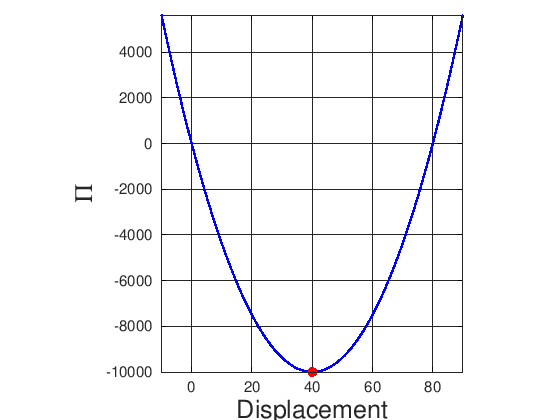

In [13]:
# Create plot variables
k=12.5; %Spring constant
F=500.0; %Force
uMin=F/k; %Displacement at minimum state
pMin=0.5*k*uMin^2-F*uMin; %Energy at minimum state
u=linspace(uMin-50,uMin+50,100); %Displacements
p=0.5*k*u.^2-F*u; %Energy

% Visualize graph
figure; hold on; %Open figure
xlabel('Displacement','FontSize',25); ylabel('\Pi','FontSize',25)%Add labels
plot(u,p,'b-','LineWidth',5); %Plot graph
plot(uMin,pMin,'r.','MarkerSize',25); %Plot point
set(gca,'FontSize',15); box on; grid on; axis tight; axis square; %Axis options

### Deriving stiffness matrices using the potential energy approach
Recall the two node spring system:  
![spring image](spring_2Node.png)   
Recalling $f_{1x}=k(u_1-u_2)$, and $f_{2x}=k(u_2-u_1)$, the potential energy $\Pi=\frac{1}{2}ku^2-Fu$ can be written: 
$$\Pi=\frac{1}{2}k(u_2-u_1)^2-f_{1x}u_1-f_{2x}u_2=\frac{1}{2}k(u_2^2-2u_1u_2+u_1^2)-f_{1x}u_1-f_{2x}u_2$$

to minimise this expression partial derivatives with the displacement components are computed and set to 0:   

$$\frac{\partial\Pi}{\partial u_1}=\frac{1}{2}k(-2u_2+2u_1)-f_{x1}=k(u_1-u_2)-f_{x1}=0$$ 
$$\frac{\partial\Pi}{\partial u_2}=\frac{1}{2}k(-2u_1+2u_2)-f_{x2}=k(u_2-u_1)-f_{x2}=0$$

Which after simplification provides:
$$\frac{\partial\Pi}{\partial u_1}=k(u_1-u_2)-f_{x1}=0$$
$$\frac{\partial\Pi}{\partial u_2}=k(u_2-u_1)-f_{x2}=0$$

Leading us to the familiar notation for the force components at node 1 and 2:
$$f_{1x}=k(u_1-u_2)$$
$$f_{2x}=k(u_2-u_1)$$
Which once again can be expressed in matrix form as:
$$\begin{Bmatrix} f_{1x} \\ f_{2x} \end{Bmatrix}=\begin{bmatrix} k & -k \\ -k & k\end{bmatrix}\begin{Bmatrix} u_1 \\ u_2\end{Bmatrix}$$

## Example: Deriving stiffness matrices using the potential energy approach

Consider the three spring system below \*:   
![spring image](springSet_3.png)   
The system consists of 3 spring "elements" and 4 nodes. Node 1 and 4 are constrained from moving. A force of 25 kN is applied to node 3 in the positive x-direction. The spring stiffnesses are:    

$k_1=200$, $k_2=400$, and $k_3=600$
        
\*Based on example 2.5 of: Daryl Logan, _"A First Course in the Finite Element Methods"_ (page 64 in the 6th edition, page 63 in the 5th edition)   


### Strain energy contributions in matrix form
The strain energy of these springs can be written: 
$$\Lambda^{(1)}=\frac{1}{2}k_1(u_1-u_2)^2=\frac{1}{2}k_1(u_1^2-2u_1u_2+u_2^2)$$
$$\Lambda^{(2)}=\frac{1}{2}k_2(u_2-u_3)^2=\frac{1}{2}k_2(u_2^2-2u_2u_3+u_3^2)$$
$$\Lambda^{(3)}=\frac{1}{2}k_3(u_3-u_4)^2=\frac{1}{2}k_3(u_3^2-2u_3u_4+u_4^2)$$


Which, expressed in matrix form become:   
$$\Lambda^{(1)}=\frac{1}{2}\begin{Bmatrix} u_1 \\ u_2 \end{Bmatrix}^\top\begin{bmatrix} k_1 & -k_1 \\ -k_1 & k_1 \end{bmatrix}\begin{Bmatrix} u_1 \\ u_2 \end{Bmatrix} \textrm{,} \quad \Lambda^{(2)}=\frac{1}{2}\begin{Bmatrix} u_2 \\ u_3 \end{Bmatrix}^\top\begin{bmatrix} k_2 & -k_2 \\ -k_2 & k_2 \end{bmatrix}\begin{Bmatrix} u_2 \\ u_3 \end{Bmatrix} \textrm{,} \quad \Lambda^{(3)}=\frac{1}{2}\begin{Bmatrix} u_3 \\ u_4 \end{Bmatrix}^\top\begin{bmatrix} k_3 & -k_3 \\ -k_3 & k_3 \end{bmatrix}\begin{Bmatrix} u_3 \\ u_4 \end{Bmatrix}$$
Note that due to the use of the tranpose operation the matrix products yield scalar energy contributions.   


In short notation we may write: 
$$\Lambda^{(i)}=\frac{1}{2}\begin{Bmatrix} u^{(i)} \end{Bmatrix}^\top\begin{bmatrix} K^{(i)} \end{bmatrix}\begin{Bmatrix} u^{(i)} \end{Bmatrix}$$
Leading to the total strain energy: 
$$\Lambda=\sum_{i=1}^{3} \Lambda^{(i)}=\frac{1}{2}\begin{Bmatrix} u \end{Bmatrix}^\top\begin{bmatrix} K \end{bmatrix}\begin{Bmatrix} u \end{Bmatrix}$$

### External work contributions in matrix form
$$W=\sum_{i=1}^{4}F_{ix}u_i=\begin{Bmatrix} u_1 \\ u_2 \\ u_3 \\ u_4 \end{Bmatrix}^\top\begin{Bmatrix} F_{1} \\ F_{2} \\ F_{3} \\ F_{4} \end{Bmatrix}=\begin{Bmatrix} u \end{Bmatrix}^\top\begin{Bmatrix} F \end{Bmatrix}$$

### Potential energy in matrix form
$$\Pi=\Lambda-W$$
Using:
$$W=\begin{Bmatrix} u \end{Bmatrix}^\top\begin{Bmatrix} F \end{Bmatrix}$$
and
$$\Lambda=\sum_{i=1}^{3} \Lambda^{(i)}=\frac{1}{2}\begin{Bmatrix} u \end{Bmatrix}^\top\begin{bmatrix} K \end{bmatrix}\begin{Bmatrix} u \end{Bmatrix}$$
we obtain:
$$\Pi=\frac{1}{2}\begin{Bmatrix} u \end{Bmatrix}^\top\begin{bmatrix} K \end{bmatrix}\begin{Bmatrix} u \end{Bmatrix}-\begin{Bmatrix} u \end{Bmatrix}^\top\begin{Bmatrix} F \end{Bmatrix}$$
Minimisation through partial derivatives with $\begin{Bmatrix} u \end{Bmatrix}$ gives:
$$\frac{\partial\Pi}{\partial \begin{Bmatrix} u \end{Bmatrix}}=\begin{bmatrix} K \end{bmatrix}\begin{Bmatrix} u \end{Bmatrix}-\begin{Bmatrix} F \end{Bmatrix}=0$$
Leading to the familiar expression:
$$\begin{Bmatrix} F \end{Bmatrix}=\begin{bmatrix} K \end{bmatrix}\begin{Bmatrix} u \end{Bmatrix}$$


### Potential energy in matrix form
$$\Pi=\frac{1}{2}\begin{Bmatrix} u \end{Bmatrix}^\top\begin{bmatrix} K \end{bmatrix}\begin{Bmatrix} u \end{Bmatrix}-\begin{Bmatrix} u \end{Bmatrix}^\top\begin{Bmatrix} F \end{Bmatrix}=\sum_{i=1}^{3} \Pi^{(i)}$$

$$\Pi=\overbrace{\bigg[\frac{1}{2}k_1(u_1^2-2u_1u_2+u_2^2)-F_{1}u_1\bigg]}^{\Pi^{(1)}}+\overbrace{\bigg[\frac{1}{2}k_2(u_2^2-2u_2u_3+u_3^2)-F_{2}u_2\bigg]}^{\Pi^{(2)}}+\overbrace{\bigg[\frac{1}{2}k_3(u_3^2-2u_3u_4+u_4^2)-F_{3}u_3\bigg]}^{\Pi^{(3)}}$$

Minimisation using the partial derivatives:
$$\frac{\partial\Pi}{\partial u_1}=k_1u_1-k_1u_2-F_{1}=k_1(u_1-u_2)-F_{1}=0$$
$$\frac{\partial\Pi}{\partial u_2}=-k_1u_1+k_1u_2+k_2u_2-k_2u_3-F_{2}=k_1(u_2-u_1)+k_2(u_2-u_3)-F_{2}=0$$
$$\frac{\partial\Pi}{\partial u_3}=-k_2u_2+k_2u_3+k_3u_3-k_3u_4-F_{3}=k_2(u_3-u_2)+k_3(u_3-u_4)-F_{3}=0$$
$$\frac{\partial\Pi}{\partial u_4}=-k_3u_3+k_3u_4-F_{4}=k_3(u_4-u_3)-F_{4}=0$$
Which can be cast in matrix form as: 
$$\begin{Bmatrix} F_1 \\ F_2 \\ F_3 \\ F_4 \end{Bmatrix}=\begin{bmatrix} k_1 & -k_1 & 0 & 0 \\ -k_1 & k_1+k_2 & -k_2 & 0  \\ 0 & -k_2 & k_2+k_3 & -k_3 \\ 0 & 0 & -k_3 & k_3 \end{bmatrix}\begin{Bmatrix} u_1 \\ u_2 \\ u_3 \\ u_4 \end{Bmatrix}$$

## Summary
* The key finite element equation:
$$\begin{Bmatrix} F\end{Bmatrix}=\begin{bmatrix} K \end{bmatrix}\begin{Bmatrix} u\end{Bmatrix}$$
* There are three main types of methods to do so:   
    * The **direct** (equilibrium) method   
        * Simple, intuitive
        * 1D problems
        $$\begin{Bmatrix} f_{1x} \\ f_{2x} \end{Bmatrix}=\begin{bmatrix} k & -k \\ -k & k\end{bmatrix}\begin{Bmatrix} u_1 \\ u_2\end{Bmatrix}$$
        $$K=\sum_{i=1}^{3} K^{(i)}$$

    * **Variational** methods
        * More general
        * Requires existance of a functional to minimize
        $$\Pi=\frac{1}{2}\begin{Bmatrix} u \end{Bmatrix}^\top\begin{bmatrix} K \end{bmatrix}\begin{Bmatrix} u \end{Bmatrix}-\begin{Bmatrix} u \end{Bmatrix}^\top\begin{Bmatrix} F \end{Bmatrix}$$
